Comme évoqué précédement, on est souvent dans la situation où l'on ne connait pas tous les paramètres d'une loi physique à vérifier. On doit donc déterminer, à partir des données expérimentales, les paramètres inconnues de la loi de sorte que la loi obtenus soit "la plus cohérente" avec les résultats expérimentaux. On parle __d'ajustement ou de régression.__

# Ajustement d'un modèle affine

```{important}
On peut réaliser l'ajustement d'un modèle quelconque a priori. Mais dans le cadre du programme, on se limitera à des méthodes d'ajustement de modèle affine (appelé par abus de langage modèle linéaire) : $Y = aX + b$.
```

## Méthode générale

Avant de rentrer dans la méthodes d'ajustment du modèle, il convient d'être méthodique. On suppose qu'on a un ensemble de mesures qui amène à construire deux mesurandes $Y$ et $X$ dont le modèle théorique les reliant est de la forme:

$$
Y = aX + b
$$

où $a$ et $b$ ne sont pas connus. On a alors réalisé une série de mesure amenant au calcul des couples $(x_i, y_i)$ (on considèrera qu'il y a k mesures en tout : $i \in \{1, 2, \ldots, k\}$ avec leurs incertitudes.

On doit alors :
1. Tracer les croix d'incertitude autour des points $(x_i, y_i)$ et vérifier qu'on peut espérer faire passer une droite par les croix d'incertitude (__vérification qualitative__).
2. Estimer au moins les paramètres $a$ et $b$ compatibles avec les points de mesures et si nécessaire l'incertitude sur les paramètres $a$ et $b$.
3. Tracer les points de mesures ET le modèle pour vérifier que le modèle passe par les croix d'incertitude (__vérification semi-qualitative__).
4. Si ce n'est pas le cas, on calculera les __écarts normalisés__ pour voir s'il y a effectivement incompatibilité.

```{margin}
Dans les premiers TPs, les écarts normalisés seront systématiquement tracés pour s'entraîner à les calculs (sous Python notamment) et à les analyser.
```

Seul le point 2. n'a pas encore été développés. On va voir comment on s'y prend.

## Régression linéaire : Méthode des moindres carrés.

Pour déterminer $a$, $b$, on va utiliser une méthode particulière appelée __méthode des moindres carrés__, cette méthode est démontrées comme étant l'une meilleures estimations de $a$ et $b$ dans de nombreux cas. Leurs incertitudes $u(a)$ et $u(b)$ seront déterminées par une méthode de Monte-Carlo (en répétant donc la méthode des moindres carrés avec des échantillons tirés aléatoirement à partir des distributions statistiques).

### Explication de la méthode.

Cf. [explications ici](https://pcsi3physiquestan.github.io/intro_python/notebook/np_polyfit.html)


```{attention}
La méthode des moindres carrés proposées ci-dessus n'est optimale que si les incertitudes sur les abscisses sont faibles voire nulles. On veillera donc __toujours à placer en abscisses les grandeurs les moins incertaines__, quitte à inverser $X$ et $Y$.
```

### Mise en pratique.

On va présenter l'utilisation de la méthode des moindres carrés uniquement sous Python au moyen de la fonction `numpy.polyfit`. Cf. [explications ici](https://pcsi3physiquestan.github.io/intro_python/notebook/np_polyfit.html) pour son utilisation.


```{margin}
Il existe une version "pondérée" `numpy.polyfit(x, y, deg, w=incy)` où w est une pondération des points en fonction de l'incertitude sur les $y_i$. `incy` est alors un vecteur numpy contenant les incertitudes sur les $y$.
```

### Exemple d'utilisation (en ligne)

,t(ms),v(cm/ms),u(v)(cm/ms)
0,100,0.034212,0.012192
1,150,0.071131,0.001280
2,200,0.099552,0.022337
3,250,0.187876,0.022701
4,300,0.221908,0.004354
5,350,0.283995,0.015038
6,400,0.287950,0.020501
7,450,0.385192,0.014928


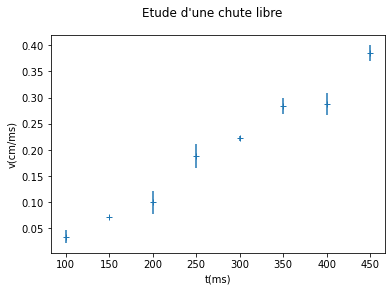

0.0009829325814596195

-0.07382949555575151

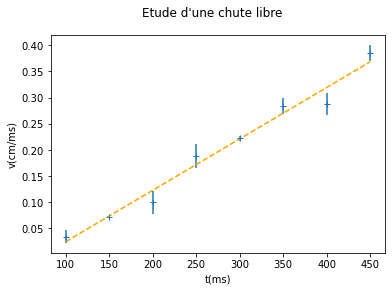

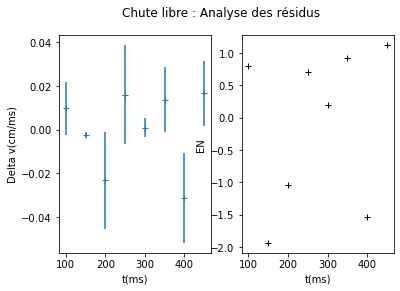

,t(ms),v(cm/ms),u(v)(cm/ms)
0,100,0.034212,0.012192
1,150,0.071131,0.001280
2,200,0.099552,0.022337
3,250,0.187876,0.022701
4,300,0.221908,0.004354
5,350,0.283995,0.015038
6,400,0.287950,0.020501
7,450,0.385192,0.014928


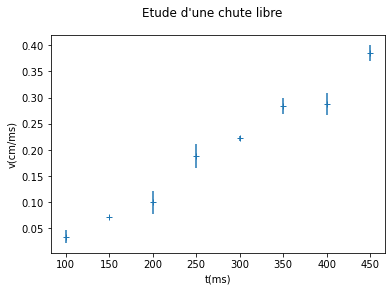

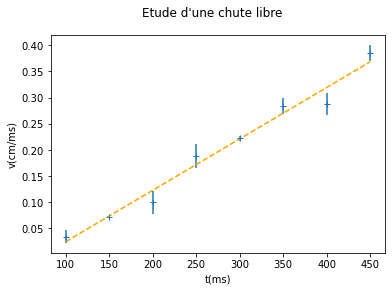

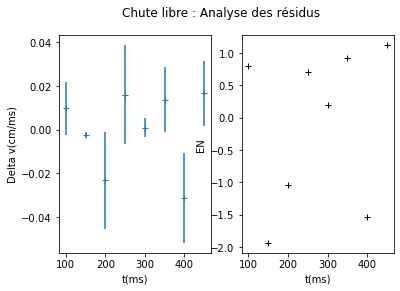

In [1]:
import numpy as np
import pandas as pd
import numpy.random as rd
import matplotlib.pyplot as plt
from myst_nb import glue

dt = 50
v0 = - 1 / 10
h0 = 100
g = 9.81 * 100 / (1000**2)
ti = np.arange(100, 550, dt)
tin = ti[:-1]
uxi = rd.normal(0.3, 0.9, len(ti))
sensi = rd.randint(2, size=len(ti))
plms = [-1, 1]
deltai = [plms[val] for val in sensi]
xi = - h0 + v0 * ti + 1/2 * g *ti**2 + deltai * uxi
vi = []
uvi = []
for i in range(len(tin)):
   vi += [(xi[i+1] - xi[i]) / dt]
   uvi += [1 / dt * np.sqrt((uxi[i+1])**2 + (uxi[i])**2)]
vi = np.array(vi)
uvi = np.array(uvi)

vtbl = pd.DataFrame({
		"t(ms)": tin,
		"v(cm/ms)": vi,
		"u(v)(cm/ms)": uvi,
	})

glue('chutetbl', vtbl, display=False)

f, ax = plt.subplots(1, 1)
f.suptitle("Etude d'une chute libre")
ax.set_xlabel("t(ms)")
ax.set_ylabel("v(cm/ms)")

ax.errorbar(tin, vi, yerr=uvi, linestyle='', marker='+')

glue('chutefig1', f, display=False)

params = np.polyfit(tin, vi, 1)

vi_adj = np.polyval(params, tin)
glue('pente', params[0])
glue('oorigine', params[1])

f1, ax1 = plt.subplots(1, 1)
f1.suptitle("Etude d'une chute libre")
ax1.set_xlabel("t(ms)")
ax1.set_ylabel("v(cm/ms)")

ax1.errorbar(tin, vi, yerr=uvi, linestyle='', marker='+')
ax1.plot(tin, vi_adj, linestyle='--', marker='', color='orange')

glue('chutefig2', f1, display=False)


residus = vi - vi_adj
enorm = residus / uvi

f2, ax2 = plt.subplots(1, 2)
f2.suptitle("Chute libre : Analyse des résidus")
ax21 = ax2[0]
ax21.set_xlabel("t(ms)")
ax21.set_ylabel("Delta v(cm/ms)")
ax21.errorbar(tin, residus, yerr=uvi, linestyle='', marker='+')

ax22 = ax2[1]
ax22.set_xlabel("t(ms)")
ax22.set_ylabel("EN")
ax22.plot(tin, enorm, marker='+', linestyle='', color="black")

glue('residusfig', f2, display=False)
display(vtbl.style)
f.savefig('./images/chute_grossier.png')
f1.savefig('./images/chute_comparaison.png')
f2.savefig('./images/chute_residus.png')

````{topic} Exemple
On étudie une chute d'un corps dans l'air partant d'une vitesse $v_0$. On veut le modéliser par un point matériel et supposer les frottements négligeables et le champ de pesanteur uniforme. L'objectif est :
* de valider les hypothèses qu'on vient de donner
* d'estimer le champ de pesanteur sur le lieu de l'expérience.

Comme, dans le modèle précédent, on attend une relation $v(t) = v_0 + gt$, on a utilisé un dispositif permettant d'obtenir des couples de mesures $(t_i, v_i)$ avec des incertitudes négligeables sur $t_i$ et des incertitudes $u(v_i)$ sur les $v_i$. On va réaliser une ajustement linéaire pour estimer le champ de pesanteur suivant le modèle proposé et vérifier la cohérence entre le modèle et l'expérience avec le champ de pesanteur estimé.

Les données expérimentales obtenues sont données dans le tableau ci-dessous

```{margin}
On a gardé la cohérence de précision entre vaeur mesurée et incertitude. On a par contre gardé plus de chiffres pour l'incertitude de manière à ce qu'il y en ait au moins 2.
```

|Echantillon|t(ms)| 	v(cm/ms) |u(v)(cm/ms)|
|:-|:-|-:|-:|
|0| 	100| 	-0.0052| 	0.0211|
|1| 	150| 	0.0934 | 	0.0194|
|2| 	200| 	0.1208 | 	0.0035|
|3| 	250| 	0.1658 | 	0.0028|
|4| 	300| 	0.2290 | 	0.0089|
|5| 	350| 	0.2612 | 	0.0091|
|6| 	400| 	0.3170 | 	0.0032|
|7| 	450| 	0.3449 | 	0.0188|

* __Vérification sommaire__
On commence par [représenter les points](chute_fig1) $(t_i,v_i)$ avec leurs incertitudes de mesure. On observe une tendance des points à s'aligner. On va donc poursuivre l'étude en recherchant des paramètres d'ajustement linéaire.

```{figure} ./images/chute_grossier.png
:name: chute_fig1
:align: center
Analyse brute des résultats.
```
* __Ajustement linéaire__
On a réalisé un ajustement linéaire. On trouve pour le modèle $V = a t + b$ : 

|Grandeur | a $(cm/ms^2)$| b (cm/ms)|
|:-|-:|-:|
|Estimation|0.0009651331|-0.074512830|

```{margin}
On a fait exprès de ne pas arrondir les valeurs car on ne connait pas pour l'instant l'incertitude de mesure.
```

<!-- On peut tracer [la courbe modèle avec les points de mesure](chute_fig2) et observer si toutes les croix intersectent bien la courbe modèle. Les points semblent proches mais on remarquera :
* qu'il n'est pas toujours évident de vérifier s'il y a intersection ou non. 
* que certains points semblent ne pas passer par la droite modèle.

C'est pourquoi on va tracer les résidus (écart modèle-mesure) et les écarts normalisés.


```{figure} ./images/chute_comparaison.png
:name: chute_fig2
:align: center
Comparaison au modèle
```

* __Résidus et écarts normalisés__

On a maintenant [tracé](chute_fig3) les résidus (gauche). On remarque que les points 3 et 8 semblent poser problème. On s'intéresse donc aux résidus normalisés (droite). Au final, l'ensemble des résidus est inférieur à 2, on va donc pouvoir considérer que l'ensemble des points sont compatibles avec le modèle ajusté ce qui permet :
* de valider la cohérence entre le modèle théorique et l'expérience
* de considérer que le champ de pesanteur $g$ peut être estimé par la pente $a$ précédente.

```{figure} ./images/chute_residus.png
:name: chute_fig3
:align: center
Résidus et écarts normalisés
```
```` -->

## Régression linéaire et incertitude.

L'estimation du champ de pesanteur précédent a peu d'utilité si on ne peut le comparer à une valeur attendue ($g = (9.81 \pm 0.10)\rm{m.s^{-2}}$). Mais pour réaliser une comparaison, il faut estimer l'incertitude sur $g_{experimental}$, donc sur la pente de la régression linéaire.

Il convient d'utiliser une méthode de Monte-Carlo pour cela. Une telle méthode sera présentée plus tard.

### Méthode de Monte-Carlo.
Le principe est donc :
1. De créer N échantillons des $v_i$ suivant une loi (normale ici) d'écart-type $u(v_i)$.
2. Pour chaque échantillons $\{v_i / 1 \leq i \leq k\}$, on estime la pente $a$ puis on en déduit $g$ 

```{margin}
Ici le passage de $a$ à $g$ sera un simple changement d'unité pour avoir des $m.s^{-2}$. Dans d'autres expériences, cela peut nécessité quelques calculs.
```

3. On a donc N simulations de $g$ : on peut tracer sa distribution et calculer son écart-type qui sera l'estimation de l'incertitude de $u(g)$. On calculera alors l'écart normalisé entre $g_{theorique}$ et $g_{experimental}$.

La cellule de code ci-dessous montre un exemple d'implémentation de cette méthode :

```{code-cell} ipython3
"""
Comme d'habitude on commence par importer les bibliothèques utiles.
"""
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt

"""
On créer les vecteurs associées aux mesures
"""
ti = [100, 150, 200, 250, 300, 350, 400, 450]
vi = [0.005226, 0.093465, 0.120806, 0.165883, 0.229025, 0.261237, 0.317062, 0.344937]
uvi = [0.021124, 0.019484, 0.003540, 0.002879, 0.008954, 0.009124, 0.003229, 0.018834]

"""
On va maintenant créer les échantillons simulés et estimer la pente puis g par régression linéaire pour chaque échantillons.

Comment pour votre exercice sur la célérité du son, on doit construire un tableau de valeurs simulés où
chaque colonne correspond à une valeur de vitesse vi(ti). Les arguments de la fonction rd.normal seront donc:
- un vecteur vi pour les espérances des distributions des vi
- un vecteur uvi pour les écart-types des distribution des vi
- un tuple (N,k) correspondant au nombre de simulations N et au nombres de points de mesure k
"""


k = len(ti)  # Nombre de points de mesure
N = 100000  # Nombre de simulations

vi_sim = rd.normal(vi, uvi, (N, k))

"""
La fonction polyfit ne permet pas de faire N régressions linéaires d'un coup. On va donc devoir
créer une boucle qui parcourt les échantillons simulés et réalise une régression linéaire pour
chaque ensemble de k mesures simulées.
"""
g_sim = np.zeros(N)   # Vecteur où on stockera les champs de pesanteur estimés
for j in range(N):
	params = np.polyfit(ti, vi_sim[j], 1)  # Régression linéaire sur la ligne j
	pente = params[0]
	g = 10000 * pente  # On passe simplement de cm/ms^2 à des m/s^2
	g_sim[j] = g


"""
On va maintenant tracer l'histogramme des valeurs, calculer la moyenne des g et l'écart-type.
"""
g_mes = np.mean(g_sim)
ug = np.std(g_sim, ddof=1)

f, ax = plt.subplots(1, 1)
f.suptitle("Simulation de Monte-Carlo : Champ de pesanteur")
ax.set_ylabel("g(m.s^2)")

ax.hist(g_sim, bins="rice")  # L'option rice adapte automatiquement le nombre de bâtons.

print("Champ de pesanteur : g = " +  str(g_mes) + " m/s^2")
print("Incertitude : u(g) =" +  str(ug) + " m/s^2")

g_th = 9.81  # Valeur théorique
ug_th = 0.1  # Incertitude sur la valeur théorique
eta = (g - g_th) / np.sqrt(ug**2 + ug_th**2)

print("Ecart normalisé : eta = " + str(eta))

"""
Pour mieux visualiser la compatibilité, on va tterminer en traçant les barre d'incertitude pour la valeur expérimentale et la valeur théorique.
"""
g_mes = np.mean(g_sim)
ug = np.std(g_sim, ddof=1)

f1, ax1 = plt.subplots(1, 1)
f1.suptitle("Comparaison théorie-valeur tabulée")
ax1.set_ylabel("g(m.s^2)")

ax1.errorbar([1], [g], yerr=ug, label="Valeur expérimentale", marker="+", color="red" )  # Valeur expérimentale
ax1.errorbar([2], [g_th], yerr=ug_th, label="Valeur expérimentale", marker="+", color="blue")  # Valeur théorique

plt.show()
```

Ensuite, il faut :
* rendre-compte de la valeur de $g$ et son incertitude avec les bons chiffres significatifs
* analyser sa valeur et l'écart normalisé pour voir si la théorie est compatible avec l'expérience.

Nous vous laissons réfléchir à ces deux points qui ont déjà été abordés.

```{note}
En pratique, on pourra(devra) combiner l'analyse de Monte-Carlo avec la validation du modèle théorique. En effet, il faudrait plutôt :
* tracer le modèle avec la valeur de g estimé par Monte-Carlo pour le comparer aux points de mesure.
* calculer les écarts normalisés avec la valeur `g_sim` et en tenant compte de `ug_sim`.

_Le test de compatibilité du modèle affine se ferait donc plutôt après la simulation de Monte-Carlo._
```